In [2]:
from helper.neural_net import *
from helper.autoencoder_helper import extract_features_encoder
from models.autoencoder import Encoder
import matplotlib.pyplot as plt
from helper.loading import *
from helper.metrics import *
from helper.image import get_imgs_gt_patches
from models.features_extraction import build_gt_from_patches

%load_ext autoreload
%autoreload 2

In [22]:
# Train the autoencoder and save the weights
train_losses, test_losses = run_experiment('convnet', 'bce', 'adam', image_dir, test_dir, num_epochs=100,
               learning_rate=1e-5, autoencoder=True, lr_scheduler=True, lr_schedule=(20, 0.1), batch_size=100)

Starting training
Epoch 0 | Avg test loss: 0.09426
Epoch 1 | Avg test loss: 0.05939
Epoch 2 | Avg test loss: 0.04339
Epoch 3 | Avg test loss: 0.03448
Epoch 4 | Avg test loss: 0.02953
Epoch 5 | Avg test loss: 0.02615
Epoch 6 | Avg test loss: 0.02361
Epoch 7 | Avg test loss: 0.02160
Epoch 8 | Avg test loss: 0.02001
Epoch 9 | Avg test loss: 0.01874
Epoch 10 | Avg test loss: 0.01791
Epoch 11 | Avg test loss: 0.01692
Epoch 12 | Avg test loss: 0.01623
Epoch 13 | Avg test loss: 0.01580
Epoch 14 | Avg test loss: 0.01534
Epoch 15 | Avg test loss: 0.01483
Epoch 16 | Avg test loss: 0.01454
Epoch 17 | Avg test loss: 0.01418
Epoch 18 | Avg test loss: 0.01396
Epoch 19 | Avg test loss: 0.01374
Epoch 20 | Avg test loss: 0.01381
Epoch 21 | Avg test loss: 0.01376
Epoch 22 | Avg test loss: 0.01377
Epoch 23 | Avg test loss: 0.01370
Epoch 24 | Avg test loss: 0.01371
Epoch 25 | Avg test loss: 0.01371
Epoch 26 | Avg test loss: 0.01366
Epoch 27 | Avg test loss: 0.01365
Epoch 28 | Avg test loss: 0.01364
Epoch 

In [23]:
len(train_losses)

62500

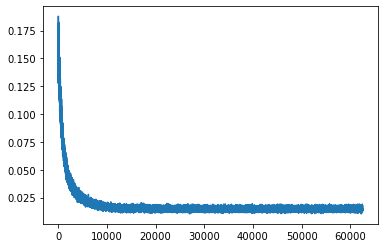

In [26]:
plt.plot(train_losses)
plt.show()

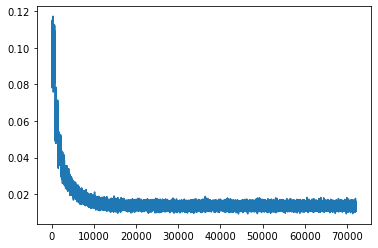

In [27]:
plt.plot(test_losses)
plt.show()

In [37]:
# Extract the patches features with the trained autoencoder
encoder = Encoder()
weights_path = 'encoder_2021-12-04_16-50-07'
X = extract_features_encoder(encoder, image_dir, weights_path)

Use GPU for features extraction.
Starting features extraction...
Features saved in output/features/features_encoder_2021-12-04_16-50-07.npy


In [38]:
X.shape

(62500, 16)

In [47]:
# Load images
imgs, gt_imgs = load_images_and_groundtruth(image_dir, gt_dir)
patches, gt_patches = get_imgs_gt_patches(imgs, gt_imgs)

y = build_gt_from_patches(gt_patches, lambda gt_patch: value_to_class(gt_patch, threshold=0.5))

X_train, y_train, X_test, y_test = split_data(X, y, ratio=0.8)

Loaded 100 images
All images have the same size !
Image size = 400, 400


NameError: name 'build_gt_from_patches' is not defined

In [ ]:
_, _, _, _ = compute_scores(y_true, y_pred)